# Wine Quality Dataset Exploratory Data Analysis
This notebook performs exploratory data analysis on the wine quality dataset, examining both red and white wines.
  

In [19]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
# Set style for better visualizations
# plt.style.use('seaborn')
sns.set_palette('husl')

## 1. Data Loading and Initial Inspection

In [20]:
# Load datasets
red_wine = pd.read_csv('../data/raw/winequality-red.csv', sep=';')
white_wine = pd.read_csv('../data/raw/winequality-white.csv', sep=';')
# Add wine type column
red_wine['wine_type'] = 'red'
white_wine['wine_type'] = 'white'
# Combine datasets
wines = pd.concat([red_wine, white_wine], axis=0, ignore_index=True)
print("Dataset Shape:", wines.shape)
print("First few rows:")
display(wines.head())
print("Dataset Info:")
wines.info()

Dataset Shape: (55, 13)
First few rows:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,red


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         55 non-null     float64
 1   volatile acidity      55 non-null     float64
 2   citric acid           55 non-null     float64
 3   residual sugar        55 non-null     float64
 4   chlorides             55 non-null     float64
 5   free sulfur dioxide   55 non-null     int64  
 6   total sulfur dioxide  55 non-null     int64  
 7   density               55 non-null     float64
 8   pH                    55 non-null     float64
 9   sulphates             55 non-null     float64
 10  alcohol               55 non-null     float64
 11  quality               55 non-null     int64  
 12  wine_type             55 non-null     object 
dtypes: float64(9), int64(3), object(1)
memory usage: 5.7+ KB


## 2. Missing Values Analysis

In [21]:
# Check for missing values
missing_values = wines.isnull().sum()
print("Missing Values:")
print(missing_values[missing_values > 0] if any(missing_values > 0) else "No missing values found")
# Display basic statistics
print("Basic Statistics:")
display(wines.describe())

Missing Values:
No missing values found
Basic Statistics:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000
mean,7.621818,0.482727,0.258182,3.840909,0.069891,22.727273,91.090909,0.995853,3.287455,0.528909,10.087273,5.690909
std,1.227568,0.227378,0.193085,4.491691,0.048996,12.502525,55.989838,0.002931,0.158058,0.093327,1.013256,0.857920
min,6.200000,0.160000,0.000000,1.000000,0.029000,4.000000,11.000000,0.989200,2.980000,0.350000,8.800000,5.000000
25%,6.650000,0.275000,0.050000,1.600000,0.045000,13.500000,39.500000,0.994000,3.180000,0.470000,9.500000,5.000000
50%,7.400000,0.460000,0.320000,2.100000,0.065000,19.000000,97.000000,0.996300,3.260000,0.520000,9.700000,5.000000
75%,8.100000,0.660000,0.400000,3.325000,0.080000,29.500000,132.500000,0.997840,3.430000,0.575000,10.450000,6.000000
max,11.600000,0.965000,0.660000,20.700000,0.387000,56.000000,245.000000,1.001000,3.610000,0.800000,12.800000,8.000000


## 3. Distribution Analysis

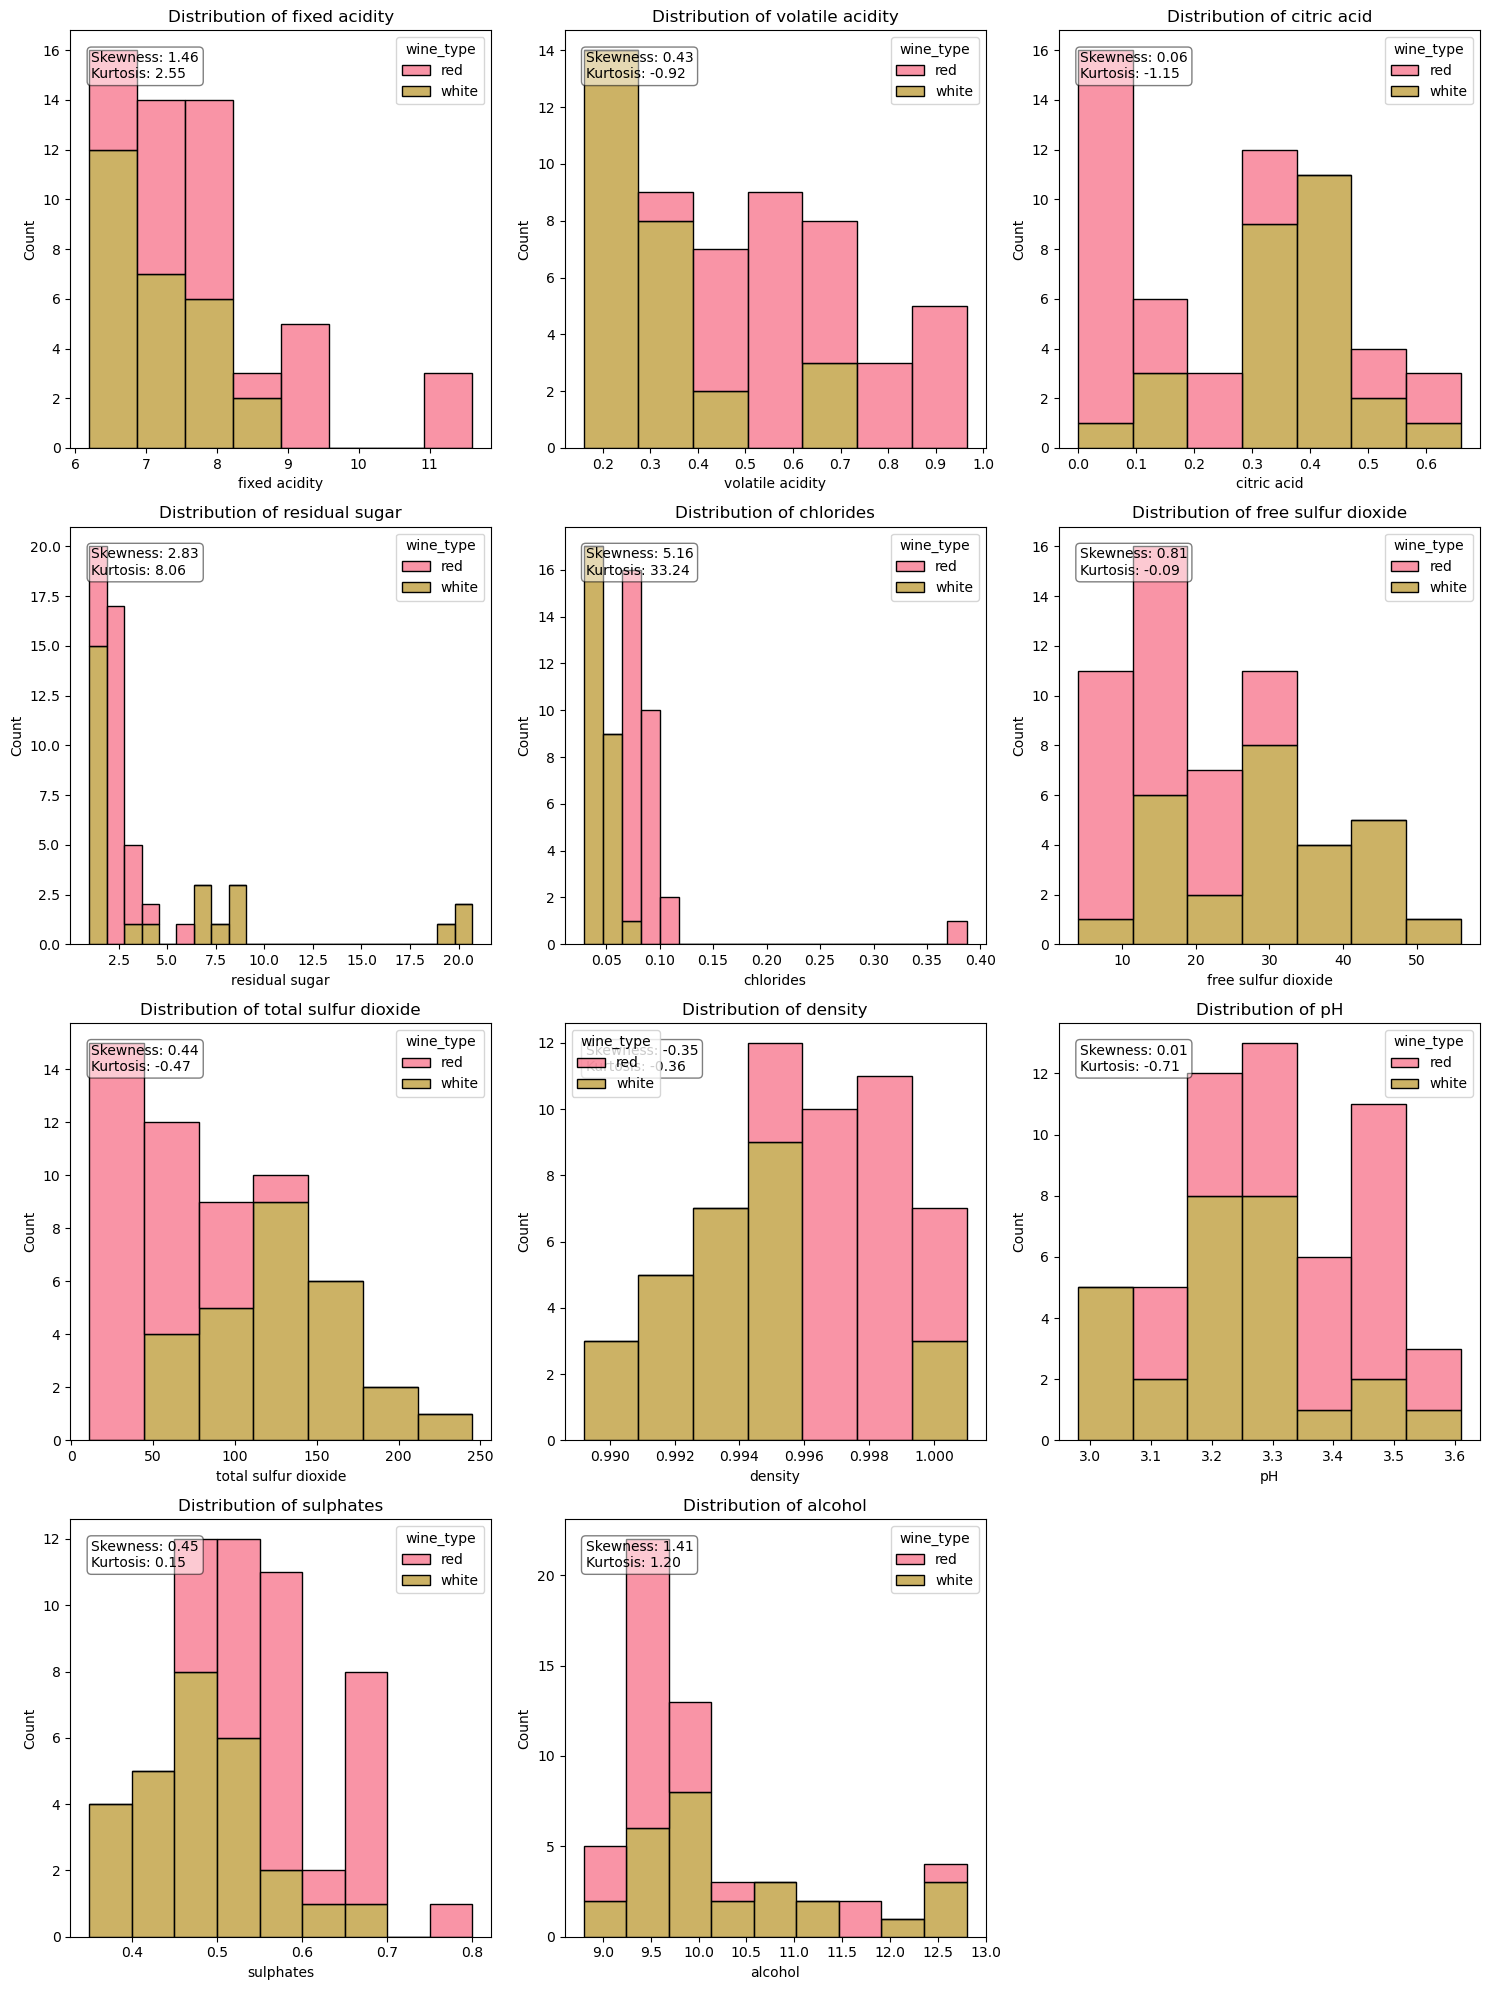

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_distributions(df, columns, rows=3):
    """
    Plot distributions for specified columns.

    Parameters:
    - df (DataFrame): The dataset containing the data.
    - columns (list): List of column names to plot.
    - rows (int): Number of rows for the subplot grid (default is 3).

    Returns:
    - None: Displays the plots.
    """
    cols = 3  # Number of columns in the subplot grid
    rows = (len(columns) + cols - 1) // cols  # Calculate the number of rows needed
    fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
    axes = axes.ravel()  # Flatten the axes array for easy indexing

    for idx, col in enumerate(columns):
        # Create a histogram for the column
        sns.histplot(data=df, x=col, hue='wine_type', multiple="stack", ax=axes[idx])
        axes[idx].set_title(f'Distribution of {col}')
        
        # Calculate skewness and kurtosis
        skew = df[col].skew()
        kurt = df[col].kurtosis()
        
        # Display skewness and kurtosis on the plot
        axes[idx].text(
            0.05, 0.95, 
            f'Skewness: {skew:.2f}\nKurtosis: {kurt:.2f}', 
            transform=axes[idx].transAxes,
            fontsize=10, 
            verticalalignment='top', 
            bbox=dict(boxstyle="round", facecolor="white", alpha=0.5)
        )
    
    # Handle any extra subplots if the number of columns is less than the grid
    for extra_idx in range(len(columns), len(axes)):
        fig.delaxes(axes[extra_idx])  # Remove unused axes

    plt.tight_layout()  # Adjust the layout to prevent overlap
    plt.show()

# Example usage:
# Select numeric columns except 'quality'
numeric_columns = wines.select_dtypes(include=[np.number]).columns.tolist()
numeric_columns.remove('quality')

# Plot distributions for the selected numeric columns
plot_distributions(wines, numeric_columns)


 ## 4. Quality Distribution Analysis

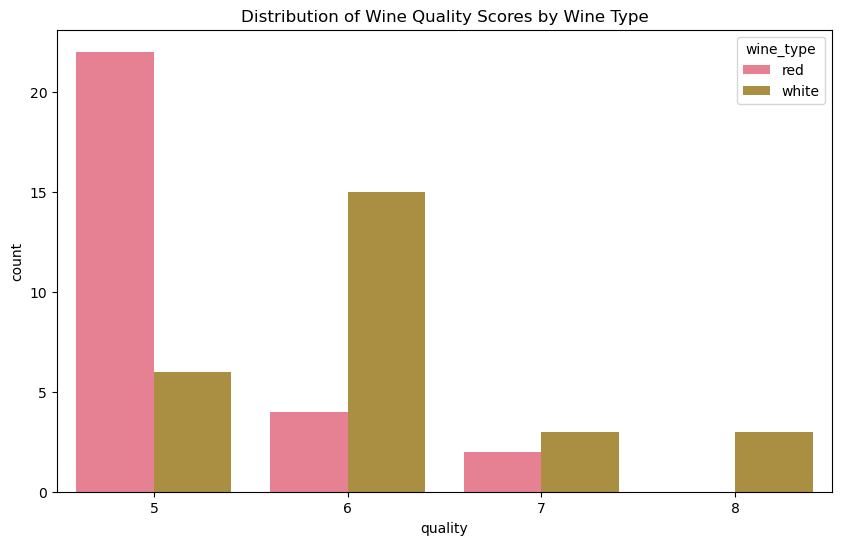


Quality Score Distribution:
quality     5   6  7  8
wine_type              
red        22   4  2  0
white       6  15  3  3


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size for the plot
plt.figure(figsize=(10, 6))

# Create a count plot for wine quality scores by wine type
sns.countplot(data=wines, x='quality', hue='wine_type')

# Add a title to the plot
plt.title('Distribution of Wine Quality Scores by Wine Type')

# Display the plot
plt.show()

# Print the heading for the quality score distribution
print("\nQuality Score Distribution:")

# Group data by wine type and quality, then display the counts in a table
quality_distribution = wines.groupby(['wine_type', 'quality']).size().unstack(fill_value=0)
print(quality_distribution)


## 5. Correlation Analysis

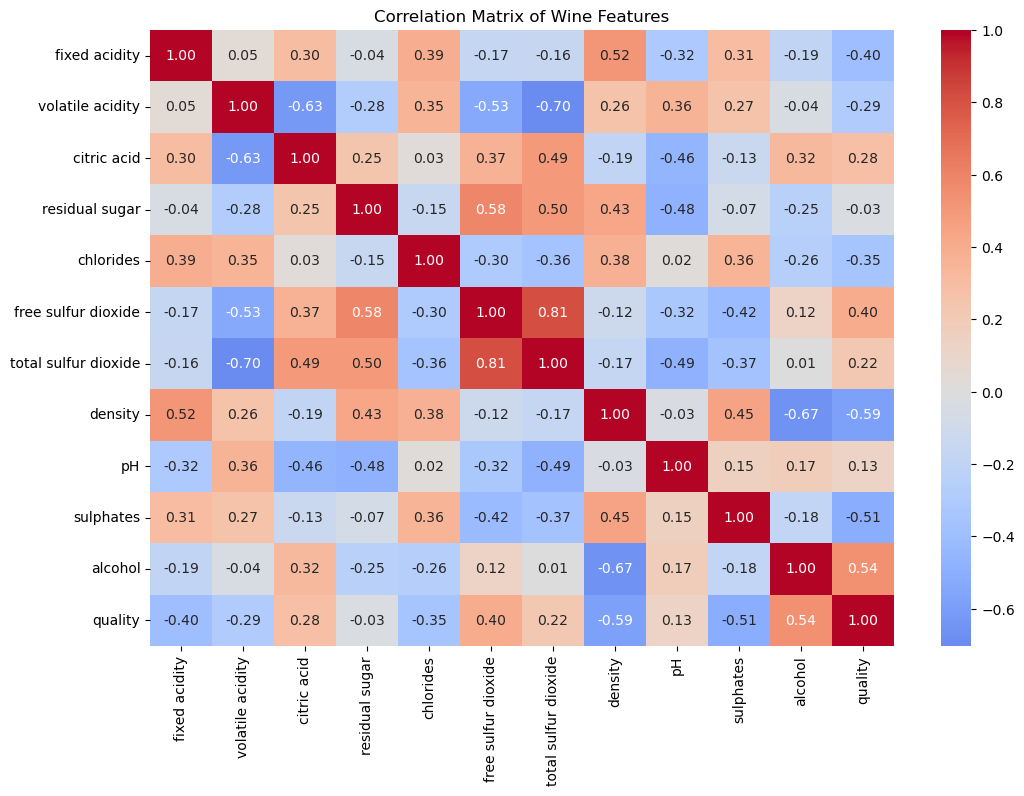


Correlations with Quality:
quality                 1.000000
alcohol                 0.540747
free sulfur dioxide     0.397718
citric acid             0.283850
total sulfur dioxide    0.222271
pH                      0.134754
residual sugar         -0.030057
volatile acidity       -0.293209
chlorides              -0.350175
fixed acidity          -0.401423
sulphates              -0.513123
density                -0.588639
Name: quality, dtype: float64


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate correlations for numeric columns
numeric_cols = wines.select_dtypes(include=[np.number]).columns
correlations = wines[numeric_cols].corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title('Correlation Matrix of Wine Features')
plt.show()

# Print correlations with the 'quality' column
print("\nCorrelations with Quality:")
quality_correlations = correlations['quality'].sort_values(ascending=False)
print(quality_correlations)


 ## 6. Feature Relationships with Quality

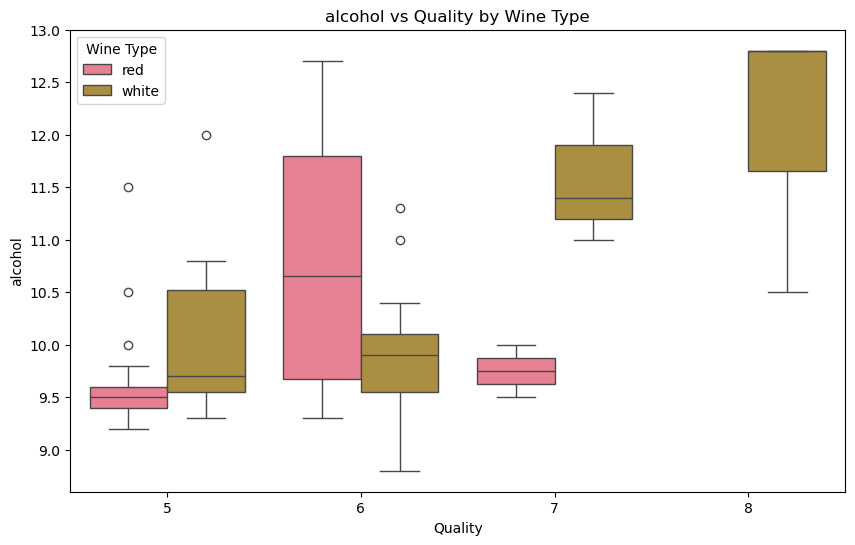

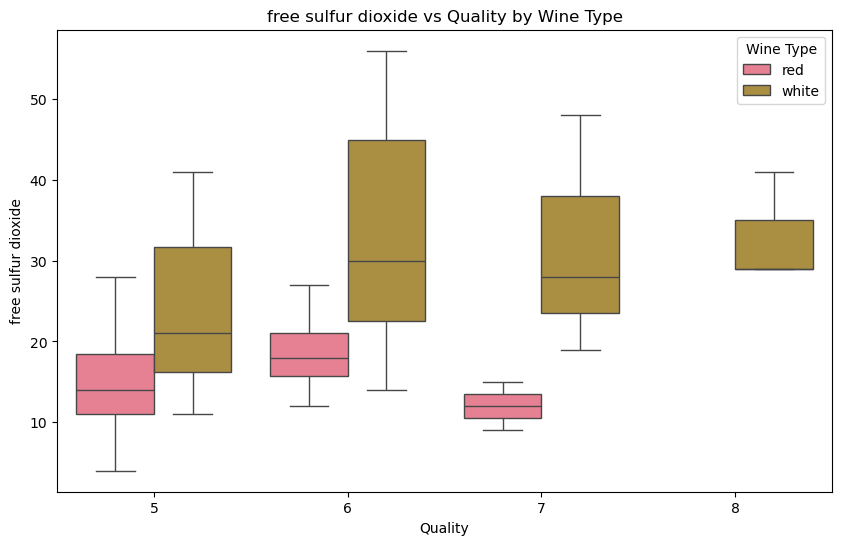

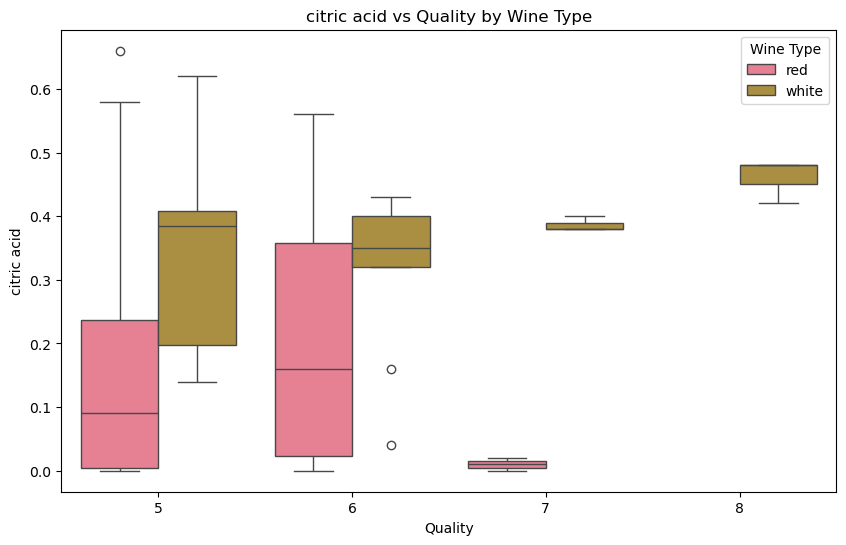

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_feature_vs_quality(df, feature):
    """
    Plots the relationship between a given feature and wine quality, 
    separated by wine type using a boxplot.
    """
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='quality', y=feature, hue='wine_type')
    plt.title(f'{feature} vs Quality by Wine Type')
    plt.xlabel('Quality')
    plt.ylabel(feature)
    plt.legend(title='Wine Type')
    plt.show()

# Plot the top 3 features most correlated with quality
top_features = quality_correlations[1:4].index  # Exclude 'quality' itself
for feature in top_features:
    plot_feature_vs_quality(wines, feature)


## 7. Outlier Analysis

In [26]:
import pandas as pd

def detect_outliers(df, columns):
    """
    Detect outliers in the specified columns of a DataFrame using the IQR method.
    
    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    columns (list): List of column names to check for outliers.
    
    Returns:
    pd.Series: A Series with the number of outliers in each column.
    """
    outliers_dict = {}
    
    for column in columns:
        # Calculate Q1, Q3, and IQR
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        
        # Determine bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Identify outliers
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outliers_dict[column] = len(outliers)
    
    return pd.Series(outliers_dict)

# Detect outliers in numeric columns
outliers = detect_outliers(wines, numeric_columns)
print("Number of outliers in each feature:")
print(outliers)


Number of outliers in each feature:
fixed acidity            3
volatile acidity         0
citric acid              0
residual sugar          11
chlorides                1
free sulfur dioxide      1
total sulfur dioxide     0
density                  0
pH                       0
sulphates                1
alcohol                  5
dtype: int64


## 8. Feature Importance Analysis

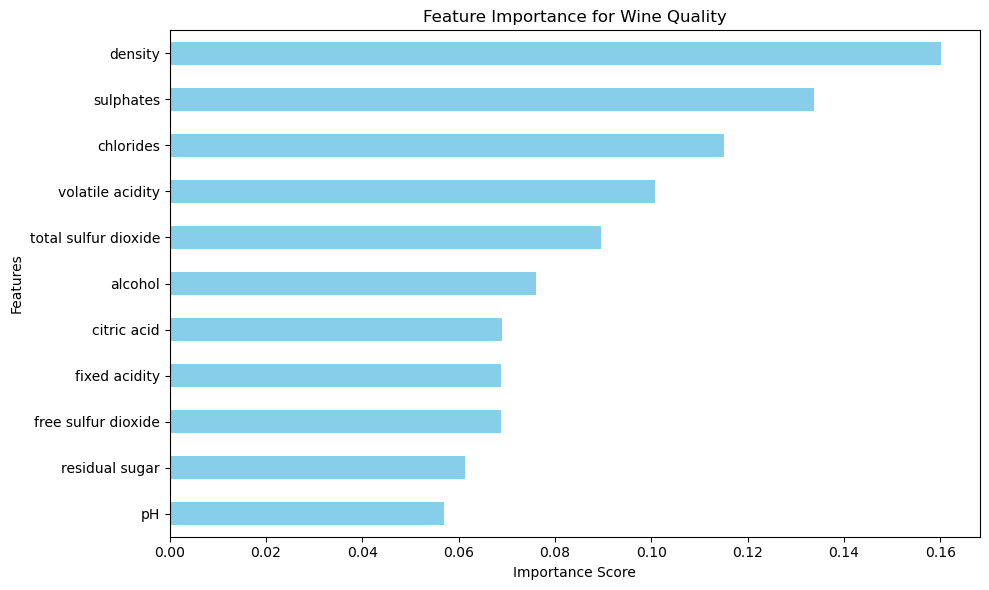

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

# Prepare data for feature importance analysis
X = wines[numeric_columns]
y = wines['quality']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train a Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_scaled, y)

# Calculate feature importance
feature_importance = pd.Series(rf.feature_importances_, index=numeric_columns)

# Plot feature importances
plt.figure(figsize=(10, 6))
feature_importance.sort_values().plot(kind='barh', color='skyblue')
plt.title('Feature Importance for Wine Quality')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


## 9. Statistical Tests

In [28]:
from scipy import stats
import pandas as pd

# Perform t-tests between red and white wines for each feature
def compare_wine_types(df, features):
    """
    Perform t-tests between red and white wines for the specified features.

    Parameters:
        df (DataFrame): The dataset containing wine data.
        features (list): List of numeric feature columns to compare.

    Returns:
        DataFrame: Results of t-tests with t-statistics and p-values.
    """
    results = {}
    for feature in features:
        red = df[df['wine_type'] == 'red'][feature]
        white = df[df['wine_type'] == 'white'][feature]
        
        # Perform t-test
        t_stat, p_value = stats.ttest_ind(red, white, equal_var=False)  # Welch's t-test
        results[feature] = {'t_statistic': t_stat, 'p_value': p_value}
    
    return pd.DataFrame(results).T

# Perform statistical tests
statistical_tests = compare_wine_types(wines, numeric_columns)

# Display results
print("Statistical tests between red and white wines:")
display(statistical_tests)


Statistical tests between red and white wines:


,t_statistic,p_value
fixed acidity,3.474938,1.198602e-03
volatile acidity,7.559349,6.775738e-10
citric acid,-4.218660,1.230010e-04
residual sugar,-2.390912,2.398417e-02
chlorides,4.368880,1.496230e-04
free sulfur dioxide,-5.572138,1.953202e-06
total sulfur dioxide,-7.956809,2.036906e-10
density,5.365809,4.655469e-06
pH,3.196109,2.350979e-03
sulphates,4.911235,9.097402e-06


## 10. Summary and Insights

1. **Data Overview**:
   - Combined dataset contains both red and white wines
   - No missing values in the dataset

2. **Quality Distribution**:
   - Quality scores range from 3 to 9
   - Most wines are rated between 5 and 7
   - Dataset is imbalanced

3. **Key Correlations**:
   - Alcohol has the strongest positive correlation with quality
   - Volatile acidity has a negative correlation with quality

4. **Outliers**:
   - Several features contain outliers
   - Need to consider outlier treatment in preprocessing

5. **Feature Importance**:
   - Top important features identified through Random Forest
   - Consider feature selection based on importance scores

6. **Recommendations for Model Development**:
   - Handle class imbalance
   - Consider feature scaling
   - May need to treat outliers
   - Consider creating interaction features


In [29]:
wines

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.700,0.00,1.90,0.076,11,34,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.880,0.00,2.60,0.098,25,67,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.760,0.04,2.30,0.092,15,54,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.280,0.56,1.90,0.075,17,60,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.700,0.00,1.90,0.076,11,34,0.99780,3.51,0.56,9.4,5,red
5,7.4,0.660,0.00,1.80,0.075,13,40,0.99780,3.51,0.56,9.4,5,red
6,7.9,0.600,0.06,1.60,0.069,15,59,0.99640,3.30,0.46,9.4,5,red
7,7.3,0.650,0.00,1.20,0.065,15,21,0.99460,3.39,0.47,10.0,7,red
8,7.8,0.580,0.02,2.00,0.073,9,18,0.99680,3.36,0.57,9.5,7,red
9,7.5,0.500,0.36,6.10,0.071,17,102,0.99780,3.35,0.80,10.5,5,red
